# Parcours des Graphes : 

In [83]:
import networkx as nx
import matplotlib.pyplot as plt
import string
import copy
import random
from random import shuffle, randrange
import numpy as np
from matplotlib.pyplot import figure
random.seed(100)

In [2]:
Graphe_ = { 
     'A':{'B':2, 'C':1}, 
     'B':{'A':2, 'C':2, 'D':1, 'E':3}, 
     'C':{'A':1, 'B':2, 'D':4, 'E':3, 'F':5}, 
     'D':{'B':1, 'C':4, 'E':3, 'F':6, 'G':5}, 
     'E':{'B':3, 'C':3, 'D':3, 'F':1}, 
     'F':{'C':5, 'D':6, 'E':1, 'G':2}, 
     'G':{'D':5, 'F':2} }



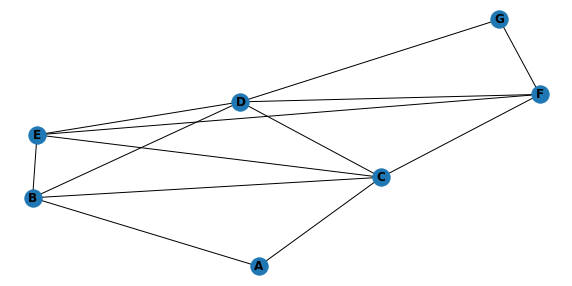

In [3]:

g = nx.Graph()
for i, j in Graphe_.items():
    for k in j:
        g.add_edge( i,k )
        
f, ax = plt.subplots(figsize=(10,5))
nx.draw(g, ax = ax, with_labels=True, font_weight='bold')

## 1-Parcours en largeur : 

In [4]:
def parc_larg(graph, sommet):
    
    if(sommet not in graph) : 
        print(" sommet introuvable !")
        return
    
    P = {sommet: None}             # le premier sommet n'a pas de père (il est pas découvert à partir un autre sommet) 
    Couleur = {sommet : 'blanc'}   # parce qu'il est pas encore traité 
    Q = [sommet]                   # File de traitement  (First In / First Out)
    count = 0                      # pour controler le nombre d'itération de la boucle while
    
    while ((len(Q)>0) and count< len(graph)-1) :  #Tant qu'on a des élément découverts et non traités dans la liste Q
        count +=1                                 # count sert à sortir de la boucle while une fois 
        if(Couleur[sommet] == 'blanc'):           
            for v in graph[sommet] :              # Détection des sommets 'v' adjacents à 'sommet'
                if(v not in P):                   # Si v n'est pas encore découvert 
                    P[v] = sommet           # on le met dans P avec son 'père'
                    Couleur[v] = 'blanc'    # additition des sommets decouverts et non traités au dictionnaire Couleur
                    Q.append(v)             # mise à jour de notre File
        

        # mettre en noir les sommet traité
        Couleur[sommet] = 'noir'             
        #retirer le sommet traité de la liste File
        Q.remove(sommet)
        #pointe le nouveau sommet vers le premier élément non traité de la File
        sommet = Q[0]
    
        print('P = ', P)
        print('couleur = ', Couleur)
        print('File = ', Q)
        print(100 * '-')
        
    # mettre en noir le dernier sommet traité
    Couleur[sommet] = 'noir'
    #retirer le dernier sommet traité de la liste File
    Q.remove(sommet)
    
    print('P = ', P)
    print('couleur = ', Couleur)
    print('File = ', Q)
    
    PL = list(Couleur.keys())
    
    return(PL)

In [5]:
PL = parc_larg(Graphe_, 'A')

P =  {'A': None, 'B': 'A', 'C': 'A'}
couleur =  {'A': 'noir', 'B': 'blanc', 'C': 'blanc'}
File =  ['B', 'C']
----------------------------------------------------------------------------------------------------
P =  {'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B'}
couleur =  {'A': 'noir', 'B': 'noir', 'C': 'blanc', 'D': 'blanc', 'E': 'blanc'}
File =  ['C', 'D', 'E']
----------------------------------------------------------------------------------------------------
P =  {'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}
couleur =  {'A': 'noir', 'B': 'noir', 'C': 'noir', 'D': 'blanc', 'E': 'blanc', 'F': 'blanc'}
File =  ['D', 'E', 'F']
----------------------------------------------------------------------------------------------------
P =  {'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C', 'G': 'D'}
couleur =  {'A': 'noir', 'B': 'noir', 'C': 'noir', 'D': 'noir', 'E': 'blanc', 'F': 'blanc', 'G': 'blanc'}
File =  ['E', 'F', 'G']
------------------------------------

In [6]:
print('parcours du graph en largeur = ', PL )

parcours du graph en largeur =  ['A', 'B', 'C', 'D', 'E', 'F', 'G']


## 2- Parcours en profondeur : 

In [7]:
def parc_prof(graph, sommet):
    P = {sommet: None}             # le premier sommet n'a pas de père (il est pas découvert à partir un autre sommet) 
    chaine = [sommet ]             # chaine parcouru
    Q = []                         # Pile des sommets  (First In / First Out)
 
    while(len(chaine) !=0) : # tant que la chaine des sommets est non vide
        count = 0
        while(count<len(graph)):
            count+=1
            dernier_sommet = chaine[-1]         #dernier sommet découvert
            for v in graph[dernier_sommet] : 
                if ((v not in chaine) and (v not in Q)  ):  # n'est pas dans la pile et n'est pas traité 
                    P[v]= dernier_sommet
                    chaine.append(v)
                    break
                else : 
                    pass

        Q.append(chaine[-1])
        chaine.pop()
        print(' P = ', P)
        print(' Q = ', Q)
        print(' chaine = ', chaine)
        print(75*'-')
         
    return Q
           

In [8]:
Q = parc_prof(Graphe_, 'B')

 P =  {'B': None, 'A': 'B', 'C': 'A', 'D': 'C', 'E': 'D', 'F': 'E', 'G': 'F'}
 Q =  ['G']
 chaine =  ['B', 'A', 'C', 'D', 'E', 'F']
---------------------------------------------------------------------------
 P =  {'B': None, 'A': 'B', 'C': 'A', 'D': 'C', 'E': 'D', 'F': 'E', 'G': 'F'}
 Q =  ['G', 'F']
 chaine =  ['B', 'A', 'C', 'D', 'E']
---------------------------------------------------------------------------
 P =  {'B': None, 'A': 'B', 'C': 'A', 'D': 'C', 'E': 'D', 'F': 'E', 'G': 'F'}
 Q =  ['G', 'F', 'E']
 chaine =  ['B', 'A', 'C', 'D']
---------------------------------------------------------------------------
 P =  {'B': None, 'A': 'B', 'C': 'A', 'D': 'C', 'E': 'D', 'F': 'E', 'G': 'F'}
 Q =  ['G', 'F', 'E', 'D']
 chaine =  ['B', 'A', 'C']
---------------------------------------------------------------------------
 P =  {'B': None, 'A': 'B', 'C': 'A', 'D': 'C', 'E': 'D', 'F': 'E', 'G': 'F'}
 Q =  ['G', 'F', 'E', 'D', 'C']
 chaine =  ['B', 'A']
------------------------------------

In [9]:
print('parcours du graph en profondeur : ', Q)

parcours du graph en profondeur :  ['G', 'F', 'E', 'D', 'C', 'A', 'B']


## 3-Recherche des chemins entre deux sommets :¶

In [10]:
class Graph(object):
       
    def __init__(self, graph):
        self.vertexlist = list(graph.keys())
        self.edgelist = []
        for v in graph: 
            for k in graph[v]:
                self.edgelist.append([v,k])        
    
    def vertices(self):
        return self.vertexlist            
    
    def print_edges(self):
        for x in self.edgelist:
            print(x[0] + " -> " + x[1])
            
    def print_paths(self, start, end):
        visited = {v : False for v in self.vertexlist} 
        temp = self.pathFinder(start, end, visited)
        return(temp)

    def pathFinder(self, begin, fin, visited, p=None):
        # Mark this node as visited.
        visited[begin] = True 
        if p is None: p = []

        p = p + [begin]
        #print('p = ', p)
        # Stopping condition - Success.
        if begin == fin: 
            return [p]

        pathlist = []
        for item in self.edgelist: 
            # First, make sure that we are following a valid path
            # and second, make sure the end of this edge has not 
            # already been visited. If not, we're ready to jump in
            if begin == item[0] and not visited[item[1]]: 
                # The next recursive call will take a 
                # fresh copy of visited and attempt to repeat 
                # the process until it has found the end.
                newpath = self.pathFinder(item[1], fin, copy.copy(visited), p)     
                pathlist.extend(newpath)

        return pathlist # Stopping condition - Failure.

### Quelques tests sur la classe : 

In [11]:
g = Graph(Graphe_)

In [12]:
#Affichage des sommets du graphe
g.vertices()

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [13]:
#Affichage des liaisons entre les sommets
g.print_edges()

A -> B
A -> C
B -> A
B -> C
B -> D
B -> E
C -> A
C -> B
C -> D
C -> E
C -> F
D -> B
D -> C
D -> E
D -> F
D -> G
E -> B
E -> C
E -> D
E -> F
F -> C
F -> D
F -> E
F -> G
G -> D
G -> F


In [14]:
#Recherche de tout les chemins possible qui mènent d'un point à un autre
print('all paths from A to D are :')
g.print_paths('A','B')

all paths from A to D are :


[['A', 'B'],
 ['A', 'C', 'B'],
 ['A', 'C', 'D', 'B'],
 ['A', 'C', 'D', 'E', 'B'],
 ['A', 'C', 'D', 'F', 'E', 'B'],
 ['A', 'C', 'D', 'G', 'F', 'E', 'B'],
 ['A', 'C', 'E', 'B'],
 ['A', 'C', 'E', 'D', 'B'],
 ['A', 'C', 'E', 'F', 'D', 'B'],
 ['A', 'C', 'E', 'F', 'G', 'D', 'B'],
 ['A', 'C', 'F', 'D', 'B'],
 ['A', 'C', 'F', 'D', 'E', 'B'],
 ['A', 'C', 'F', 'E', 'B'],
 ['A', 'C', 'F', 'E', 'D', 'B'],
 ['A', 'C', 'F', 'G', 'D', 'B'],
 ['A', 'C', 'F', 'G', 'D', 'E', 'B']]

## 4- Création d'un Labyrinthe on appliquant le parcours de profondeur :

In [21]:
LARGEUR = 2
HAUTEUR = 1
# Foction voisinage qui crée des sommets voisins à un sommet donné
def voisinage(couple):
    """
    Renvoie la liste des cellules voisines de la cellule (ligne, colonne) = couple dans la grille.
    """
    listeVoisins = []
    i, j = couple[0], couple[1]
    for d in (-1, 1):
        if -1 < i+d < HAUTEUR: listeVoisins.append( (i+d, j) )
        if   -1 < j+d < LARGEUR: listeVoisins.append( (i, j+d) )
    print('couple = ', couple)
    print('list des voisins = ',listeVoisins )
    return listeVoisins


#combinaison de parcours en profonduer et la fonction voisinage pour créer et retourner un graphe P
def dfs(s) :
    P,Q={s :None},[s]
    print('P = ', P)
    print('Q = ', Q)
    while Q :
        u = Q[-1]
        R=[y for y in voisinage(u) if y not in P]
       
        if R :
            v=random.choice(R)
            P[v]=u
            Q.append(v)
        else :
            Q.pop()
    print(50*'-')
    print('la chaine Q = ', Q)     
    print('le dictionnaire P = ', P)
    return P   


In [23]:
dfs((0,0))   #pour (HAUTEUR, LARGEUR) = (2,1)

P =  {(0, 0): None}
Q =  [(0, 0)]
couple =  (0, 0)
list des voisins =  [(0, 1)]
couple =  (0, 1)
list des voisins =  [(0, 0)]
couple =  (0, 0)
list des voisins =  [(0, 1)]
--------------------------------------------------
la chaine Q =  []
le dictionnaire P =  {(0, 0): None, (0, 1): (0, 0)}


{(0, 0): None, (0, 1): (0, 0)}

In [24]:
#####  Gardons que le nécessaire  #####

# Foction voisinage qui crée des sommets voisins à un sommet donné
def voisinage(couple):
    listeVoisins = []
    i, j = couple[0], couple[1]
    for d in (-1, 1):
        if -1 < i+d < HAUTEUR: listeVoisins.append( (i+d, j) )
        if   -1 < j+d < LARGEUR: listeVoisins.append( (i, j+d) )
    return listeVoisins

#combinaison de parcours en profonduer et la fonction voisinage pour créer et retourner un graphe P
def dfs(s) :
    P,Q={s :None},[s]
    while Q :
        u = Q[-1]
        R=[y for y in voisinage(u) if y not in P]
       
        if R :
            v=random.choice(R)
            P[v]=u
            Q.append(v)
        else :
            Q.pop()
    return P

In [ ]:
# LARGEUR = 3
# HAUTEUR = 2
def Labyrinthe():
    
    labyrinthe = [ [0 for j in range(2*LARGEUR+1)] for i in range(2*HAUTEUR+1)]
    parcours = dfs((0,0))
    print(parcours)
    
    
#     for i,j in parcours:
#         if ( (i,j)!=(0, 0)):
#             k,l = parcours[(i,j)] 
#             if((i+k+1 == 2*HAUTEUR -2) and (j+l+1 == 2*LARGEUR-1) ):
#                 m,n = i,j
    
    
    dic_new = {}
    for i in parc.keys():
        dic_new[i] = [parc[i]]
        if parc[i] in dic_new.keys():
            dic_new[parc.get(i)].append(i)

    for i in parc.keys():
        dic_new[i] = {node : 1 for node in dic_new[i] if node != None }
    
    g=Graph(dic_new)
    g.print_paths((0,0),(1,2))
    
    
    for i,j in parcours:
        labyrinthe[2*i+1][2*j+1] = 1   # on commence par le traçage des keys  
        print('ij = ',(i,j))
        if ( (i,j)!=(0, 0)) : 
            k,l = parcours[(i,j)]      # pour le traçage des liasons (les dictionnaires associés à chaque clé) 
            labyrinthe[2*k+1][2*l+1] = 1   # pour tracer un point qui ne fait pas un dictionnaire (qui mene nul part)
            labyrinthe[i+k+1][j+l+1] = 1   
#             if((i+k+1 == 2*HAUTEUR -2) and (j+l+1 == 2*LARGEUR-1) ): 
#                 print('ijkl = ',(i,j), (k,l))
#                 labyrinthe[i+k+1][j+l+1] = 1
            
#             if((i+k+1 == 2*HAUTEUR -2) and (j+l+1 == 2*LARGEUR-1) ): 
#                 print('ijkl = ',(i,j), (k,l))
#                 labyrinthe[i+k+1][j+l+1] = 1
    
    
    
    
    
    
    
    
    
    labyrinthe[1][0] = 2                     # premier carreau jaune (de départ)
    labyrinthe[2*HAUTEUR-1][2*LARGEUR] = 2   # dernier carreau jaune (d'arrivée)
    
#     labyrinthe[2][5] = 1              #  2*hauteur-2, 2*largeur-1  (2,5)  => i+k+1 = 2*hauteur-2 , j+l+1 = 2*largeur-1 
#     labyrinthe[2*HAUTEUR-1][2*LARGEUR-2] = 1   #  2*hauteur-1, 2*largeur-2  (3,4) 
    return (labyrinthe,parcours)


## 5- Affichage du Labyrinthe et du chemin entre le sommet d'entrée et le sommet de sortie Avec matplotlib :

In [81]:

def Labyrinthe():
    # création d'une labyrinthe vide (matrice des zéros)
    labyrinthe = [ [0 for j in range(2*LARGEUR+1)] for i in range(2*HAUTEUR+1)] 
    # récupération d'un dictionnaire de sommets (aléatoirement fait par combinaison de parcours de profondeur et voisinage)
    parcours = dfs((0,0))  
    
    #transformation du parcours à un graphe de sommets (dictionnaire de dictionnaires)
    graphe_new = {}
    for i in parcours.keys():
        graphe_new[i] = [parcours[i]]
        if parcours[i] in graphe_new.keys():
            graphe_new[parcours.get(i)].append(i)
    for i in parcours.keys():
        graphe_new[i] = {node : 1 for node in graphe_new[i] if node != None }
    
    
    #passer le graphe_new dans la classe Graphe pour pouvoir le traiter et l'expoloiter
    g=Graph(graphe_new)
    
    #recherche du chemin du point de départ (0,0) vers le point d'arrivée (HAUTEUR-1,LARGEUR-1)
    #Rq : print_paths cherche tout les chemin possible, mais on est dans le cas d'une labyrithne parfaite => y'a toujours un seule et unique chemin 
    path = g.print_paths((0,0),(HAUTEUR-1,LARGEUR-1))
    
    #coloriage de tout les sommets avec leurs liaisons en bleu
    for (i,j) in parcours : 
        labyrinthe[2*i+1][2*j+1] = 1
        if ( (i,j)!=(0, 0)) : 
            k,l = parcours[(i,j)]      # pour le traçage des liasons (les dictionnaires associés à chaque clé)
            labyrinthe[2*k+1][2*l+1] = 1   # pour tracer un point qui ne fait pas un dictionnaire (qui mene nul part)
            labyrinthe[i+k+1][j+l+1] = 1 
    
    #coloriage de tout les sommets du chemin avec leurs liaisons en jaune
    for (i,j) in parcours : 
        if((i,j) in path[0]):
            labyrinthe[2*i+1][2*j+1] = 2
            if ( (i,j)!=(0, 0)) : 
                k,l = parcours[(i,j)]      # pour le traçage des liasons (les dictionnaires associés à chaque clé)
                labyrinthe[2*k+1][2*l+1] = 2   # pour tracer un point qui ne fait pas un dictionnaire (qui mene nul part)
                labyrinthe[i+k+1][j+l+1] = 2   
        

    labyrinthe[1][0] = 3                    # premier carreau jaune (de départ)
    labyrinthe[2*HAUTEUR-1][2*LARGEUR] = 3  # dernier carreau jaune (d'arrivée)
      
    return (labyrinthe, graphe_new)

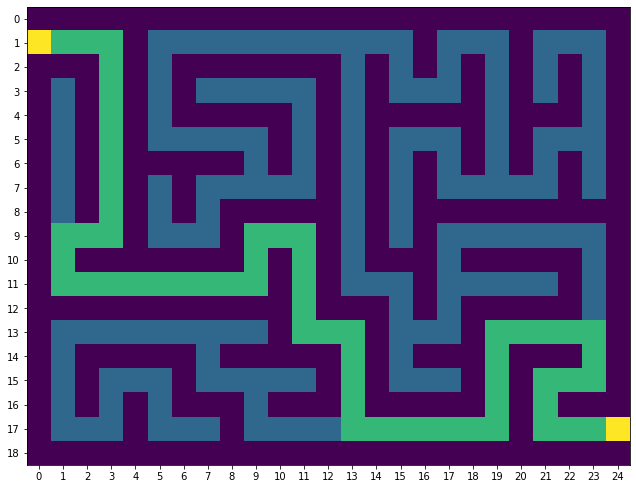

In [82]:
LARGEUR = 12
HAUTEUR = 9

figure(num=None, figsize=(HAUTEUR*1.2, LARGEUR*1.2))

lab , graphe_n= Labyrinthe()
plt.imshow(lab)

# on cache les graduations:
plt.xticks(np.arange(0, len(lab[0]), 1.0))
plt.yticks(np.arange(0, len(lab), 1.0))
# on visualise le résultat:
plt.show()

In [57]:
print('labyrinth matrix = ', lab)
print()
print('dictionnaire du labyrinthe : ')
graphe_n

labyrinth matrix =  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0], [0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0], [0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0], [0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 2, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 2, 2, 0], [0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0], [0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

dictionnaire du labyrinthe : 


{(0, 0): {(1, 0): 1},
 (1, 0): {(0, 0): 1, (2, 0): 1},
 (2, 0): {(1, 0): 1, (3, 0): 1},
 (3, 0): {(2, 0): 1, (3, 1): 1},
 (3, 1): {(3, 0): 1, (3, 2): 1},
 (3, 2): {(3, 1): 1, (3, 3): 1},
 (3, 3): {(3, 2): 1, (2, 3): 1},
 (2, 3): {(3, 3): 1, (1, 3): 1},
 (1, 3): {(2, 3): 1, (0, 3): 1},
 (0, 3): {(1, 3): 1, (0, 4): 1, (0, 2): 1},
 (0, 4): {(0, 3): 1, (1, 4): 1},
 (1, 4): {(0, 4): 1, (1, 5): 1},
 (1, 5): {(1, 4): 1, (0, 5): 1},
 (0, 5): {(1, 5): 1, (0, 6): 1},
 (0, 6): {(0, 5): 1, (0, 7): 1},
 (0, 7): {(0, 6): 1, (1, 7): 1},
 (1, 7): {(0, 7): 1, (1, 6): 1},
 (1, 6): {(1, 7): 1, (2, 6): 1},
 (2, 6): {(1, 6): 1, (2, 7): 1},
 (2, 7): {(2, 6): 1, (3, 7): 1},
 (3, 7): {(2, 7): 1, (4, 7): 1},
 (4, 7): {(3, 7): 1, (4, 6): 1},
 (4, 6): {(4, 7): 1, (3, 6): 1},
 (3, 6): {(4, 6): 1, (3, 5): 1},
 (3, 5): {(3, 6): 1, (2, 5): 1},
 (2, 5): {(3, 5): 1, (2, 4): 1},
 (2, 4): {(2, 5): 1, (3, 4): 1},
 (3, 4): {(2, 4): 1, (4, 4): 1},
 (4, 4): {(3, 4): 1, (4, 3): 1, (4, 5): 1},
 (4, 3): {(4, 4): 1, (4, 2): 1},

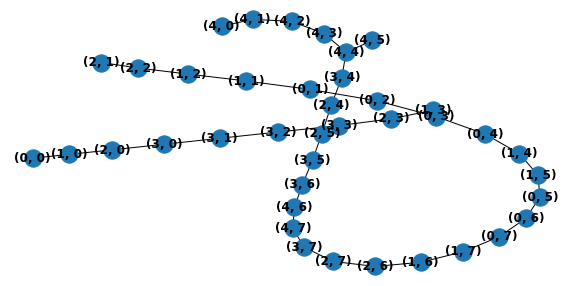

In [59]:
g = nx.Graph()
for i, j in graphe_n.items():
    for k in j:
        g.add_edge( i,k )
        
f, ax = plt.subplots(figsize=(10,5))
nx.draw(g, ax = ax, with_labels=True, font_weight='bold')

In [63]:
g=Graph(graphe_n)

In [64]:
#Affichage des sommets avec la fonction vertices de la classe Graph
g.vertices()

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (2, 3),
 (1, 3),
 (0, 3),
 (0, 4),
 (1, 4),
 (1, 5),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 7),
 (1, 6),
 (2, 6),
 (2, 7),
 (3, 7),
 (4, 7),
 (4, 6),
 (3, 6),
 (3, 5),
 (2, 5),
 (2, 4),
 (3, 4),
 (4, 4),
 (4, 3),
 (4, 2),
 (4, 1),
 (4, 0),
 (4, 5),
 (0, 2),
 (0, 1),
 (1, 1),
 (1, 2),
 (2, 2),
 (2, 1)]

In [65]:
#Affichage du chemin parcouru depuis le départ jusqu'à l'arrivée
g.print_paths((0,0),(HAUTEUR-1,LARGEUR-1))

[[(0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (3, 1),
  (3, 2),
  (3, 3),
  (2, 3),
  (1, 3),
  (0, 3),
  (0, 2),
  (0, 1),
  (1, 1),
  (1, 2)]]

In [66]:
#Affichage des sommets (les clès du graphe)
list(parc.keys())

[(0, 0),
 (0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (4, 0),
 (3, 0),
 (2, 0),
 (1, 0),
 (4, 2),
 (3, 2),
 (2, 2),
 (2, 3),
 (1, 3),
 (1, 2),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 5),
 (1, 6),
 (0, 6),
 (0, 7),
 (1, 7),
 (2, 7),
 (2, 6),
 (2, 5),
 (2, 4),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 7),
 (4, 6),
 (4, 5),
 (4, 4),
 (4, 3),
 (3, 3),
 (1, 4)]

In [120]:
dic = {(0, 0): {(1, 0): 1 },
 (1, 0): {(0, 0): 1, (2, 0): 1},
 (2, 0): {(1, 0): 1, (3, 0): 1, (3,3):1},
 (3, 0): {(2, 0): 1, (3, 1): 1},
 (3, 1): {(3, 0): 1, (3, 2): 1},
 (3, 2): {(3, 1): 1, (3, 3): 1},
 (3, 3): {(3, 2): 1, (2, 3): 1},
 (2, 3): {(3, 3): 1, (1, 3): 1},
 (1, 3): {(2, 3): 1, (0, 3): 1},
 (0, 3): {(1, 3): 1, }
 
 
 }

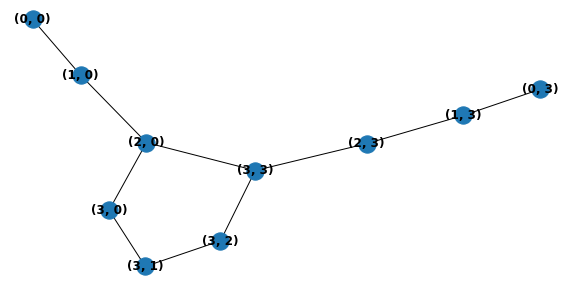

In [121]:
g = nx.Graph()
for i, j in dic.items():
    for k in j:
        g.add_edge( i,k )
        
f, ax = plt.subplots(figsize=(10,5))
nx.draw(g, ax = ax, with_labels=True, font_weight='bold')

In [122]:
g=Graph(dic)

In [123]:
#Affichage du chemin parcouru depuis le départ jusqu'à l'arrivée
path = g.print_paths((0,0),(0,3))

In [124]:
path

[[(0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (3, 1),
  (3, 2),
  (3, 3),
  (2, 3),
  (1, 3),
  (0, 3)],
 [(0, 0), (1, 0), (2, 0), (3, 3), (2, 3), (1, 3), (0, 3)]]